In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
h1 = 1
h2_value = np.linspace(-1.6, 1.6, 30)
lst = []
for h2 in h2_value:
    lst.append(h1)
    lst.append(h2)
    if h2 < -1.15:
        y = -1 # Antiferromagnetic
    elif h2 > 0:
        y = 1 # Paramagnetic   
    else:
        y = 0 # SPT
        
    lst.append(y)
reg_data = np.array(lst).reshape(30,3)

data = pd.DataFrame(reg_data, columns=['h1', 'h2', 'target'])
data.to_csv('regular_train_set.csv', index = False)

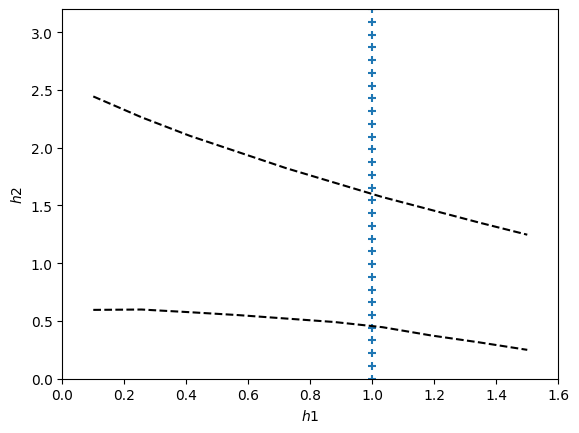

In [7]:
h1_vals = [0.1000, 0.2556, 0.4111, 0.5667, 0.7222, 0.8778, 1.0333, 1.1889, 1.3444, 1.5000]
anti_ferro_mag_boundary = np.array([-1.004, -1.0009, -1.024, -1.049, -1.079, -1.109, -1.154,  -1.225, -1.285, -1.35])+np.ones(10)*1.6
para_mag_boundary = np.array([0.8439, 0.6636, 0.5033, 0.3631, 0.2229, 0.09766, -0.02755, -0.1377, -0.2479, -0.3531])+np.ones(10)*1.6

plt.plot(h1_vals, anti_ferro_mag_boundary, "--", color = 'black', label="Antiferromagnetics")
plt.plot(h1_vals, para_mag_boundary, "--", color = 'black', label="Paramagnetic")

plt.scatter(x = data['h1'], y=data['h2']+1.6, marker='+')

plt.xlim(0,1.6)
plt.ylim(0, 3.2)
plt.xlabel('$h1$')
plt.ylabel('$h2$')
plt.savefig('regular_trainset_scatter_plot.png')

plt.show()

In [8]:
h1_value = np.linspace((1e-5), 1.6, 20)
h2_value = np.linspace(-1.6, 1.6, 20)
lst = []
for h1v in h1_value:
    for h2v in h2_value:
        lst.append(h1v)
        lst.append(h2v)

rand_data = np.array(lst).reshape(int(len(lst)/2), 2)
data = pd.DataFrame(rand_data, columns=['h1', 'h2'])
data.to_csv('test_set.csv', index=False)

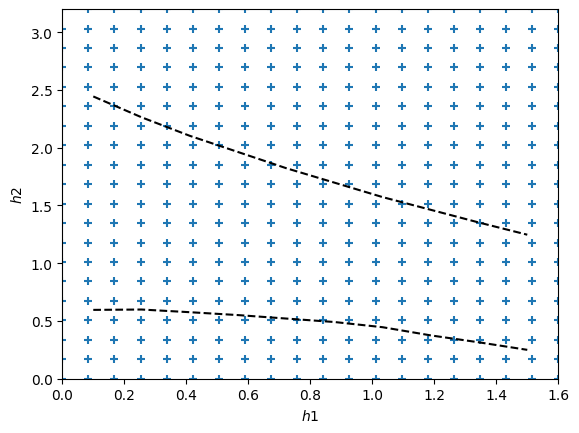

In [9]:
h1_vals = [0.1000, 0.2556, 0.4111, 0.5667, 0.7222, 0.8778, 1.0333, 1.1889, 1.3444, 1.5000]
anti_ferro_mag_boundary = np.array([-1.004, -1.0009, -1.024, -1.049, -1.079, -1.109, -1.154,  -1.225, -1.285, -1.35])+np.ones(10)*1.6
para_mag_boundary = np.array([0.8439, 0.6636, 0.5033, 0.3631, 0.2229, 0.09766, -0.02755, -0.1377, -0.2479, -0.3531])+np.ones(10)*1.6

plt.plot(h1_vals, anti_ferro_mag_boundary, "--", color = 'black', label="Antiferromagnetics")
plt.plot(h1_vals, para_mag_boundary, "--", color = 'black', label="Paramagnetic")

plt.scatter(x = data['h1'], y=data['h2']+1.6, marker='+')

plt.xlim(0,1.6)
plt.ylim(0, 3.2)
plt.xlabel('$h1$')
plt.ylabel('$h2$')
plt.savefig('testset_scatter_plot.png')

plt.show()

In [10]:
center_para = np.array([1.1,0.8])
points_para = center_para + 0.16 * np.random.randn(20,2)
dataset_para = pd.DataFrame(points_para, columns=['h1', 'h2'])
dataset_para['target'] = np.ones(20)
center_SPT = np.array([0.7,-.4])
points_SPT = center_SPT + 0.15 * np.random.randn(20,2)
dataset_SPT = pd.DataFrame(points_SPT, columns=['h1', 'h2'])
dataset_SPT['target'] = np.zeros(20)
center_anti = np.array([0.2,-1.4])
points_anti = center_anti + 0.1 * np.random.randn(15,2)
dataset_anti = pd.DataFrame(points_anti, columns=['h1', 'h2'])
dataset_anti['target'] = np.ones(15)*-1

data = pd.concat([dataset_anti,dataset_para,dataset_SPT])
data.to_csv('random_train_set.csv', index = False)

In [11]:
target= data['target'].astype(int)

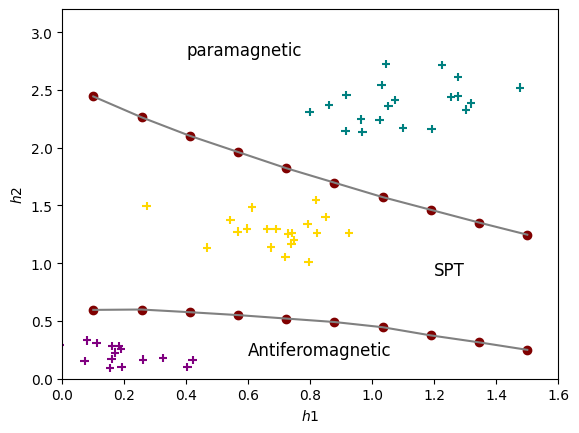

In [26]:
h1_vals = [0.1000, 0.2556, 0.4111, 0.5667, 0.7222, 0.8778, 1.0333, 1.1889, 1.3444, 1.5000]
anti_ferro_mag_boundary = np.array([-1.004, -1.0009, -1.024, -1.049, -1.079, -1.109, -1.154,  -1.225, -1.285, -1.35])+np.ones(10)*1.6
para_mag_boundary = np.array([0.8439, 0.6636, 0.5033, 0.3631, 0.2229, 0.09766, -0.02755, -0.1377, -0.2479, -0.3531])+np.ones(10)*1.6

plt.plot(h1_vals, anti_ferro_mag_boundary, "-", color = 'gray', label="Antiferromagnetics")
plt.plot(h1_vals, para_mag_boundary, "-", color = 'gray', label="Paramagnetic")

target = data['target'].astype(int)
target = target.tolist()
custom_colors = ['gold', 'teal', 'purple']

colors = [custom_colors[t] for t in target]
plt.scatter(x = data['h1'], y=data['h2']+1.6, marker='+', c=colors)

plt.scatter(h1_vals, anti_ferro_mag_boundary, c='maroon', marker='o', label="Anti data")
plt.scatter(h1_vals, para_mag_boundary, c='maroon', marker='o', label="Para data")

plt.text(x=0.4,y=2.8, s='paramagnetic', fontsize=12)
plt.text(x = 1.2, y = 0.9, s = 'SPT', fontsize=12)
plt.text(x = 0.6, y = 0.2, s  ='Antiferomagnetic', fontsize = 12)
plt.xlim(0,1.6)
plt.ylim(0, 3.2)
plt.xlabel('$h1$')
plt.ylabel('$h2$')
plt.savefig('random_trainset_scatter_plot.png')

plt.show()